# Introduction

•	In this task, the aim to validate the accuracy of predictive models for Kinetic Aqueous Solubility. Our focus will be on validating the eos74bo model for predicting the  probability of a compound having poor solublibity (< 10 µg/ml). This is crucial for understanding the behavior of molecules in aqueous environments.
This will be achieved in the following steps:

•	Import necessary libraries

•	Data preprocessing

•	Model bias evaluation


# Data processing

In this notebook, I am loading a list of molecules I obtained from ChEMBL and processing them to make sure I have:
- Standard SMILES representation of the compound
- InChIKey associated to the compound

In [1]:
# In this codeblock I will import the necessary packages and specify the paths to relevant folders
# import the necessary packages and specify the paths to relevant folders

%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH="$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore

!wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh -O miniconda.sh
!bash miniconda.sh -b -f -p $MINICONDA_PREFIX

!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
import sys

_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

!pip install rdkit

sys.path.append("/content/drive/MyDrive/Ersilia_Week2Task")

## Mount google drive
from google.colab import drive

drive.mount("/content/drive")


# specify your output folder

output_folder = "/content/drive/MyDrive/Ersilia_Week2Task"  # @param {type:"string"}

# specify your output folder

output_folder = "/content/drive/MyDrive/Ersilia_Week2Task"  # @param {type:"string"}

# specify the name of your input csv file

input_filename = "/content/drive/MyDrive/Ersilia_Week2Task/reference_library.csv"  # @param {type:"string"}


In [2]:
# In this codeblock I will load the data from the /data folder to a Pandas dataframe and understand which headers it has

import pandas as pd
df= pd.read_csv("/content/drive/MyDrive/Ersilia_Week2Task/reference_library.csv")

# check the first five rows with its header
print(df.shape)
print(df.head())

(1000, 1)
                                              smiles
0                       CCCCNC(=S)N/N=C/C1=C(C)C=CS1
1         CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1
2           O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl
3  O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...
4  CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...


In [3]:
# In this codeblock I will convert the molecules to standard SMILES by using the function standardise_smiles from /src
# I will import the function directly from src, not copying it here

from src import standardise_smiles

# Define the column containing the molecules (SMILES strings)
smiles_column = 'smiles'

# Convert molecules to standard SMILES
df['standardized_smiles'] = df[smiles_column].apply(standardise_smiles)


In [4]:
df.head()

,smiles,standardized_smiles
0,CCCCNC(=S)N/N=C/C1=C(C)C=CS1,CCCCNC(=S)N/N=C/c1sccc1C
1,CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1,Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1
2,O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl,O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl
3,O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...,O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1
4,CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...,CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1


In [ ]:
# In this codeblock I will get the Inchikey representation of the molecules using the RDKIT package

from src import get_inchikey

# Apply the function to the "standardise_smile" column
df["inchi_key"] = df["standardized_smiles"].apply(get_inchikey)

# Display the DataFrame with the added standardized SMILES column
print(df.head())


In [15]:
# In this codeblock I will save the data as a .csv file containing only the standard smiles and the inchikey as columns.
# All data will be saved with informative names in the /data folder


# Select only the 'standardized_smiles' and 'inchi_key' columns
selected_columns = ['standardized_smiles', 'inchi_key']
df = df[selected_columns]

# Specify the path where you want to save the CSV file
output_folder = '/content/drive/MyDrive/Ersilia_Week2Task'
output_filename = 'standard_smiles_inchikey.csv'
output_path = f'{output_folder}/{output_filename}'

# Save the selected DataFrame to a CSV file
df.to_csv(output_path, index=False)


# Model Predictions



In [16]:
#  Extract SMILES to a list
standardized_smiles_list = df['standardized_smiles'].tolist()

In [17]:

# enter model name
model_name = "eos74bo"  # @param {type:"string"}

# Fetch the Model
import time

begin = time.time()
!ersilia fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")


⬇️  Fetching model eos74bo: ncats-solubility
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
[]
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos74bo: ncats-solubility

   URL: http://127.0.0.1:44137
   PID: 18294
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
⛔ Model eos74bo closed
👍 Model eos74bo fetched successfully!
Time taken: 173.2 seconds


In [18]:
# Serve the model

!ersilia serve $model_name

sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos74bo: ncats-solubility

   URL: http://127.0.0.1:56359
   PID: 20054
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


In [19]:
# Run predictions

api = "predict"  # @param {type:"string"}

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
output = model.api(input=standardized_smiles_list, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()


Successful 👍! Time taken: 63.88 seconds


In [20]:
# Check your results
print(output.head())

# Save my results in Google Drive

#output_path = f'{output_folder}/{model_name}'
output_path = "%s/%s_output.csv" % (output_folder, model_name)
output.to_csv(output_path, index=False)



                           key  \
0  SUTWUYBMBWPLMW-MDWZMJQESA-N   
1  RIYHJWOTNJXDLV-UHFFFAOYSA-N   
2  OGNBARHGQVMGGX-UHFFFAOYSA-N   
3  WQEXDIRUOYNDCM-UHFFFAOYSA-N   
4  YEGVLLQDOGYWDQ-OAHLLOKOSA-N   

                                               input  outcome  
0                           CCCCNC(=S)N/N=C/c1sccc1C    0.990  
1              Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1    0.272  
2                 O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl    0.017  
3       O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1    0.991  
4  CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1    0.999  


# Model Bias Evaluation

Now, I will use the predictions I got from the Ersilia Model Hub on the dataset of 1000 molecules curated above and see how are they distributed in their space (which might be 0 to 1 for probabilities, or different for regression models)

In [22]:
# In this codeblock I will load the predictions I've run on Ersilia and saved in the /data folder

predictions=pd.read_csv(r"/content/drive/MyDrive/Ersilia_Week2Task/eos74bo_output.csv")

# check the first 5 rows
predictions.head()


,key,input,outcome
0,SUTWUYBMBWPLMW-MDWZMJQESA-N,CCCCNC(=S)N/N=C/c1sccc1C,0.990
1,RIYHJWOTNJXDLV-UHFFFAOYSA-N,Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1,0.272
2,OGNBARHGQVMGGX-UHFFFAOYSA-N,O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl,0.017
3,WQEXDIRUOYNDCM-UHFFFAOYSA-N,O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1,0.991
4,YEGVLLQDOGYWDQ-OAHLLOKOSA-N,CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1,0.999


In [26]:
predictions.columns

Index(['key', 'input', 'outcome'], dtype='object')

The predictions dataframe contains 3 columns which is 'key', 'input', 'outcome'. The outcome is interpreted as probability of a compound having poor solublibity (< 10 µg/ml)

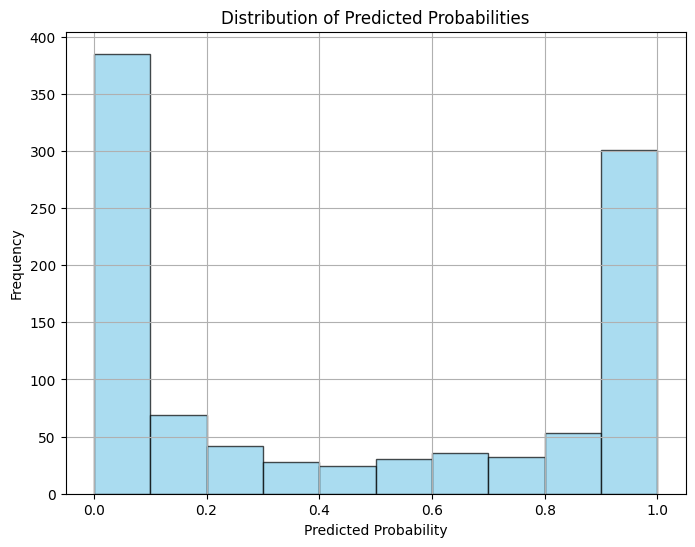

In [23]:
# In this codeblock I will create the necessary plots with MatPlotLib to observe the distribution of predicted values

import matplotlib.pyplot as plt

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(predictions['outcome'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Interpretation

Model eos74bo information

Kinetic aqueous solubility (μg/mL) was experimentally determined using the same SOP in over 200 NCATS drug discovery projects. A final dataset of 11780 non-redundant molecules and their associated solubility was used to train a SVM classifier. Approximately half of the dataset has poor solubility (< 10 μg/mL), and two-thirds of these low soluble molecules report values of < 1 μg/mL. A subset of the data used is available at PubChem (AID 1645848).

Comparing the model information with predictions the model generated, it can be inferred that the model is not biased from the visualisation above. The model was able generate that half of the dataset has poor solubility.

In [25]:
# let set probability of aqeous solubility
threshold = 0.5

# Count the number of predictions with low solubility (probability < 0.5)
num_low_solubility = predictions[predictions['outcome'] < threshold].shape[0]

print("Number of predictions with low solubility (threshold 0.5):", num_low_solubility)

Number of predictions with low solubility (threshold 0.5): 548


<ipython-input-24-26aef0d17e71>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(predictions['outcome'], shade=True)


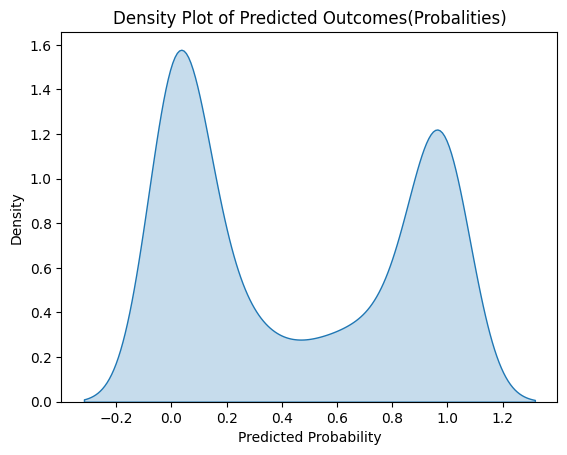

In [24]:
import seaborn as sns

# Plot density plot of predicted values
plt.figure(figsize=(8, 6))
sns.kdeplot(predictions['outcome'], shade=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Density Plot of Predicted Outcomes(Probalities)')
plt.show()
